# Technicals to Add
### RSI, MACD, CCI, Bollinger Bands, SMA 9, SMA 20, SMA 50, SMA 100, SMA 200

#### RSI - Done
#### MACD - Done
#### CCI - Done
#### Bollinger Bands - Done
#### SMA - Done

In [5]:

import pandas as pd
from pandas_datareader import data as web
from pandas_datareader import data as pdr
import matplotlib.pyplot as plt
import datetime as dt
import numpy as np
from pathlib import Path

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

C:\Users\19293\anaconda3.0\lib\site-packages\pandas_datareader\compat\__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal


In [4]:
!pip install pandas-datareader

In [4]:
!pip install --upgrade pandas

Requirement already up-to-date: pandas in /home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages (1.0.3)
Requirement not upgraded as not directly required: numpy>=1.13.3 in /home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages (from pandas) (1.14.3)
Requirement not upgraded as not directly required: python-dateutil>=2.6.1 in /home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages (from pandas) (2.7.3)
Requirement not upgraded as not directly required: pytz>=2017.2 in /home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages (from pandas) (2018.4)
Requirement not upgraded as not directly required: six>=1.5 in /home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages (from python-dateutil>=2.6.1->pandas) (1.11.0)
You are using pip version 10.0.1, however version 20.0.2 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [7]:
file_path = Path("Resources/spy_data_pedro.csv")
spy_df = pd.read_csv(file_path)

In [8]:
spy_px = spy_df[["Date", "SPY Close", "High", "Low"]]
spy_px.head()

,Date,SPY Close,High,Low
0,1/2/2014,161.633575,184.070007,182.479996
1,1/3/2014,161.607040,183.600006,182.630005
2,1/6/2014,161.138702,183.559998,182.080002
3,1/7/2014,162.128388,183.789993,182.949997
4,1/8/2014,162.163788,183.830002,182.889999


## Bollinger Bands

In [9]:
bollinger_window = 20
spy_px['bollinger_mid_band'] = spy_px["SPY Close"].rolling(window=bollinger_window).mean()
spy_px.head()

,Date,SPY Close,High,Low,bollinger_mid_band
0,1/2/2014,161.633575,184.070007,182.479996,NaN
1,1/3/2014,161.607040,183.600006,182.630005,NaN
2,1/6/2014,161.138702,183.559998,182.080002,NaN
3,1/7/2014,162.128388,183.789993,182.949997,NaN
4,1/8/2014,162.163788,183.830002,182.889999,NaN


In [10]:
bollinger_std = spy_px["SPY Close"].rolling(window=20).std()
spy_px["bollinger_upper_band"] = spy_px["bollinger_mid_band"] + bollinger_std
spy_px["bollinger_lower_band"] = spy_px["bollinger_mid_band"] - bollinger_std

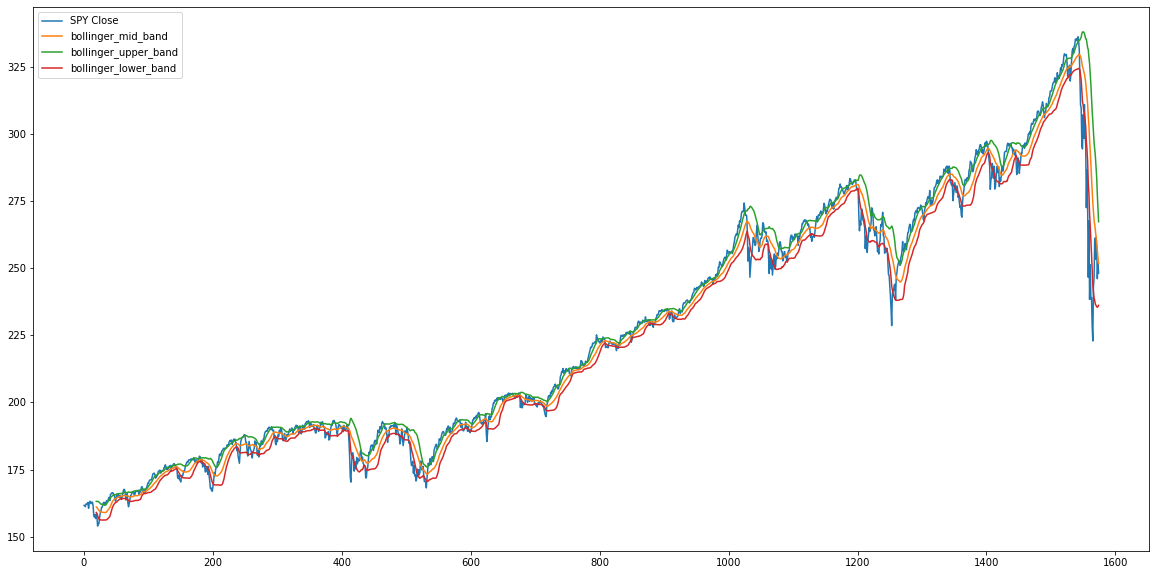

In [11]:
spy_px[["SPY Close",'bollinger_mid_band','bollinger_upper_band','bollinger_lower_band']].plot(figsize=(20,10))

In [12]:
spy_px['bollinger_long'] = np.where(spy_px['SPY Close'] < spy_px['bollinger_lower_band'], 1.0, 0.0)
spy_px['bollinger_short'] = np.where(spy_px['SPY Close'] > spy_px['bollinger_upper_band'], -1.0, 0.0)
spy_px['bollinger_signal'] = spy_px['bollinger_long'] + spy_px['bollinger_short']

In [13]:
spy_px.iloc[20:25, :]

,Date,SPY Close,High,Low,bollinger_mid_band,bollinger_upper_band,bollinger_lower_band,bollinger_long,bollinger_short,bollinger_signal
20,1/31/2014,157.445129,179.289993,176.919998,160.825484,163.045499,158.605470,1.0,0.0,1.0
21,2/3/2014,153.901810,178.369995,173.830002,160.440223,163.135235,157.745211,1.0,0.0,1.0
22,2/4/2014,154.979782,175.839996,174.110001,160.132277,163.083019,157.181535,1.0,0.0,1.0
23,2/5/2014,154.785431,175.559998,173.710007,159.765129,162.905185,156.625074,1.0,0.0,1.0
24,2/6/2014,156.826599,177.479996,175.220001,159.498270,162.650513,156.346026,0.0,0.0,0.0


## MACD

In [14]:
#macd_df = pd.DataFrame(spy_px[['Date', 'SPY Close']])

# Set short and long SMAs
short_sma = 12
long_sma = 26

# Construct a 'Fast' and 'Slow' Exponentiall Moving Average from short and long windows, respectively
spy_px['macd 12d sma'] = spy_px['SPY Close'].ewm(halflife=short_sma).mean()
spy_px['macd 26d sma'] = spy_px['SPY Close'].ewm(halflife=long_sma).mean()

# Construct a crossover trading signal
spy_px['MACD Long'] = np.where(spy_px['macd 12d sma'] > spy_px['macd 26d sma'], 1.0, 0.0)
spy_px['MACD Short'] = np.where(spy_px['macd 12d sma'] < spy_px['macd 26d sma'], -1.0, 0.0)

# Construct MACD Signal
spy_px['MACD Signal'] = spy_px['MACD Long'] + spy_px['MACD Short']

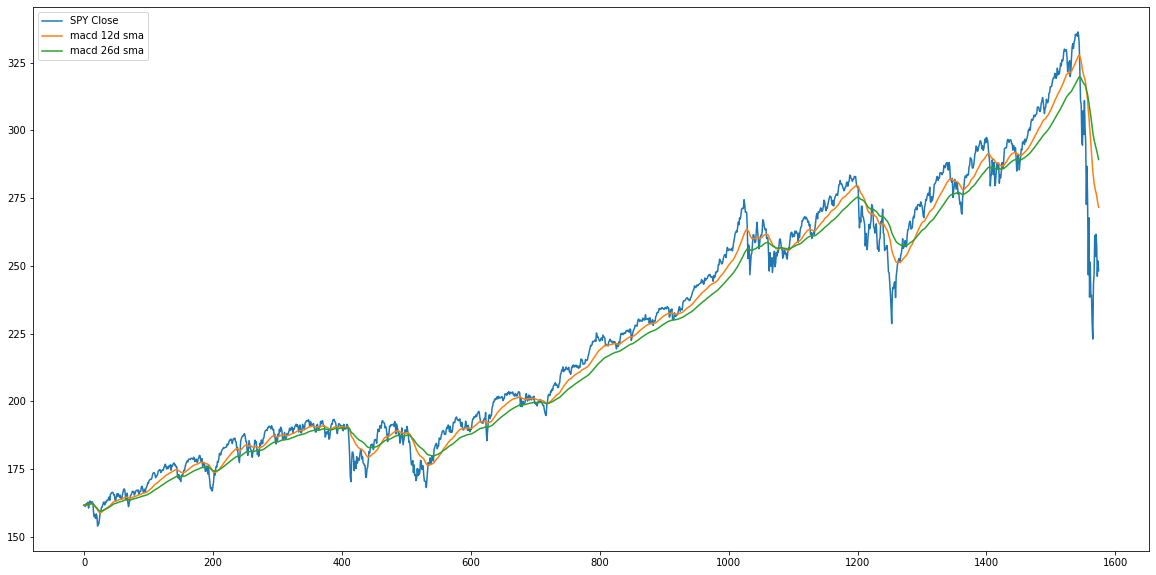

In [10]:
#macd_df.tail(20)
spy_px[["SPY Close",'macd 12d sma','macd 26d sma']].plot(figsize=(20,10))

## RSI

In [15]:
#rsi_df = pd.DataFrame(spy_px[['Date', 'SPY Close']])

def computeRSI(data, time_window):
    diff = data.diff(1).dropna()        # diff in one field(one day)

    #this preservers dimensions off diff values
    up_chg = 0 * diff
    down_chg = 0 * diff
    
    # up change is equal to the positive difference, otherwise equal to zero
    up_chg[diff > 0] = diff[diff > 0]
    
    # down change is equal to negative deifference, otherwise equal to zero
    down_chg[diff < 0] = diff[diff < 0]
    
    # check pandas documentation for ewm
    # https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html
    # values are related to exponential decay
    # we set com=time_window-1 so we get decay alpha=1/time_window
    up_chg_avg   = up_chg.ewm(com=time_window-1 , min_periods=time_window).mean()
    down_chg_avg = down_chg.ewm(com=time_window-1 , min_periods=time_window).mean()
    
    rs = abs(up_chg_avg/down_chg_avg)
    rsi = 100 - 100/(1+rs)
    return rsi

spy_px['RSI'] = computeRSI(spy_px['SPY Close'], 14)

In [12]:
# Construct a crossover trading signal
spy_px['RSI Long'] = np.where(spy_px['RSI'] < 30, 1.0, 0.0)
spy_px['RSI Short'] = np.where(spy_px['RSI'] > 70, -1.0, 0.0)

# Construct MACD Signal
spy_px['RSI Signal'] = spy_px['RSI Long'] + spy_px['RSI Short']

In [16]:
spy_px.iloc[14:30, :]

,Date,SPY Close,High,Low,bollinger_mid_band,bollinger_upper_band,bollinger_lower_band,bollinger_long,bollinger_short,bollinger_signal,macd 12d sma,macd 26d sma,MACD Long,MACD Short,MACD Signal,RSI
14,1/23/2014,161.518722,183.399994,181.820007,NaN,NaN,NaN,0.0,0.0,0.0,162.201766,162.167025,1.0,0.0,1.0,45.814168
15,1/24/2014,158.072571,181.660004,178.830002,NaN,NaN,NaN,0.0,0.0,0.0,161.817526,161.856829,0.0,-1.0,-1.0,29.201997
16,1/27/2014,157.294922,179.520004,177.119995,NaN,NaN,NaN,0.0,0.0,0.0,161.411666,161.527504,0.0,-1.0,-1.0,26.837181
17,1/28/2014,158.231583,179.300003,178.119995,NaN,NaN,NaN,0.0,0.0,0.0,161.135565,161.300009,0.0,-1.0,-1.0,33.791896
18,1/29/2014,156.711746,178.550003,176.880005,NaN,NaN,NaN,0.0,0.0,0.0,160.762920,160.996286,0.0,-1.0,-1.0,28.978382
19,1/30/2014,158.373001,179.809998,178.259995,161.034907,163.112227,158.957587,1.0,0.0,1.0,160.567107,160.829297,0.0,-1.0,-1.0,39.177007
20,1/31/2014,157.445129,179.289993,176.919998,160.825484,163.045499,158.605470,1.0,0.0,1.0,160.317749,160.621629,0.0,-1.0,-1.0,36.062144
21,2/3/2014,153.901810,178.369995,173.830002,160.440223,163.135235,157.745211,1.0,0.0,1.0,159.817184,160.223237,0.0,-1.0,-1.0,27.176201
22,2/4/2014,154.979782,175.839996,174.110001,160.132277,163.083019,157.181535,1.0,0.0,1.0,159.447860,159.922298,0.0,-1.0,-1.0,32.616092
23,2/5/2014,154.785431,175.559998,173.710007,159.765129,162.905185,156.625074,1.0,0.0,1.0,159.098951,159.636365,0.0,-1.0,-1.0,32.149798


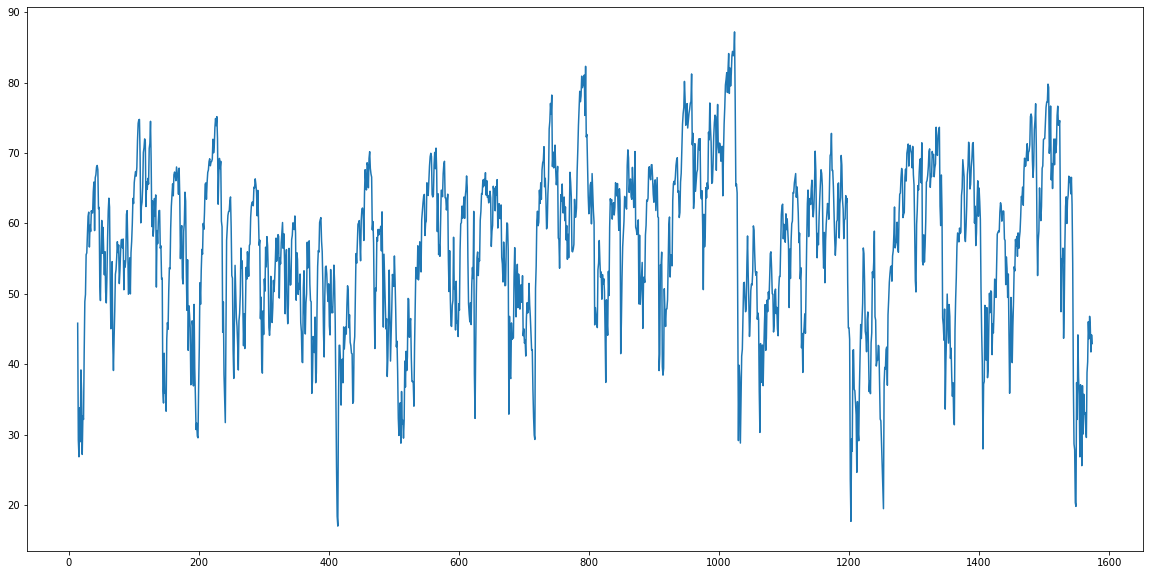

In [17]:
spy_px['RSI'].plot(figsize=(20,10))

## SMAs

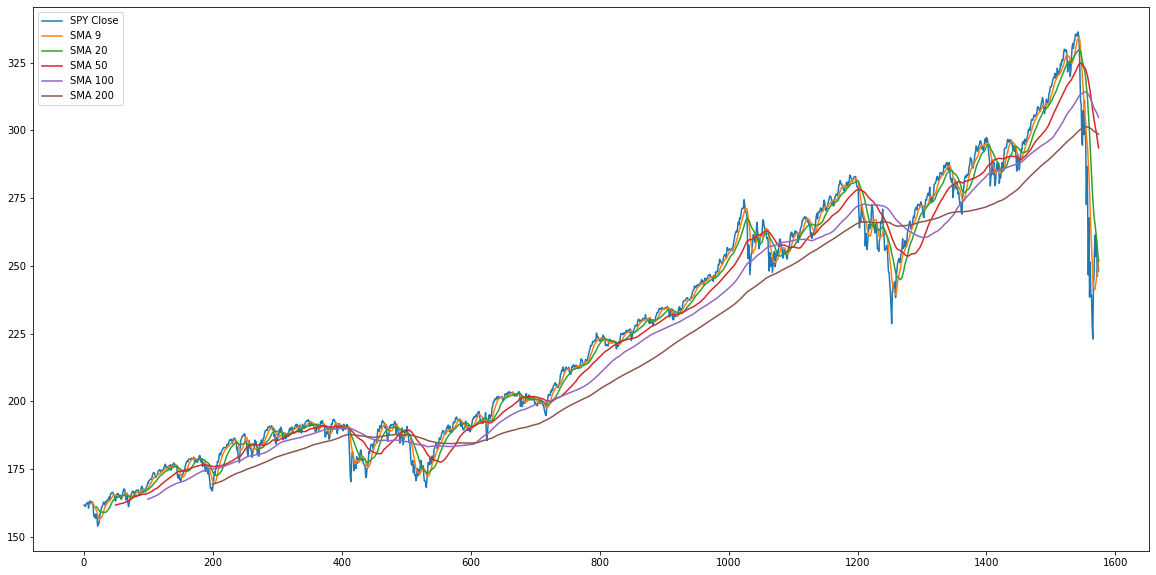

In [18]:
#sma_close = spy_df[["Date", "SPY Close"]].set_index("Date")

spy_sma_9 = spy_px['SPY Close'].rolling(window=9).mean()
spy_sma_20 = spy_px['SPY Close'].rolling(window=20).mean()
spy_sma_50 = spy_px['SPY Close'].rolling(window=50).mean()
spy_sma_100 = spy_px['SPY Close'].rolling(window=100).mean()
spy_sma_200 = spy_px['SPY Close'].rolling(window=200).mean()

#sma_df = pd.concat([[spy_sma_9, spy_sma_20, spy_sma_50, spy_sma_100, spy_sma_200]])#, index_col="Date")
#sma_df.head(10)
#print(spy_sma_9[:20])

spy_px['SMA 9'] = pd.DataFrame(spy_sma_9)
spy_px['SMA 20'] = pd.DataFrame(spy_sma_20)
spy_px['SMA 50'] = pd.DataFrame(spy_sma_50)
spy_px['SMA 100'] = pd.DataFrame(spy_sma_100)
spy_px['SMA 200'] = pd.DataFrame(spy_sma_200)

#spy_close.tail()
spy_px[["SPY Close",'SMA 9','SMA 20', 'SMA 50', 'SMA 100', 'SMA 200']].plot(figsize=(20,10))

In [17]:
#spy_px[["SPY Close"]].iloc[240:290, :]

In [19]:
# Construct a crossover trading signal
spy_px['SMA Long'] = np.where(spy_px['SPY Close'] < spy_px['SMA 200'], 1.0, 0.0)
spy_px['SMA Short'] = np.where(spy_px['SPY Close'] > spy_px['SMA 200'] + 20, -1.0, 0.0)

# Construct MACD Signal
spy_px['SMA Signal'] = spy_px['SMA Long'] + spy_px['SMA Short']

In [20]:
spy_px.iloc[240:250, :]

,Date,SPY Close,High,Low,bollinger_mid_band,bollinger_upper_band,bollinger_lower_band,bollinger_long,bollinger_short,bollinger_signal,...,MACD Signal,RSI,SMA 9,SMA 20,SMA 50,SMA 100,SMA 200,SMA Long,SMA Short,SMA Signal
240,12/15/2014,178.751190,202.529999,198.779999,184.289976,186.354651,182.225302,1.0,0.0,1.0,...,1.0,35.141056,183.608263,184.289976,179.440194,177.929966,173.628700,0.0,0.0,0.0
241,12/16/2014,177.317673,202.399994,197.860001,184.000584,186.581178,181.419991,1.0,0.0,1.0,...,1.0,31.695274,182.614749,184.000584,179.469223,177.939911,173.686532,0.0,0.0,0.0
242,12/17/2014,180.793991,202.339996,198.289993,183.832146,186.509717,181.154576,1.0,0.0,1.0,...,1.0,45.620684,182.030390,183.832146,179.622072,177.983905,173.760994,0.0,0.0,0.0
243,12/18/2014,185.264770,212.970001,203.919998,183.902030,186.598732,181.205328,0.0,0.0,0.0,...,1.0,57.594397,181.908939,183.902030,179.803772,178.080187,173.855911,0.0,0.0,0.0
244,12/19/2014,186.053070,207.330002,205.610001,183.995203,186.734224,181.256182,0.0,0.0,0.0,...,1.0,59.296251,182.013451,183.995203,180.071120,178.184084,173.954415,0.0,0.0,0.0
245,12/22/2014,186.908920,207.470001,206.460007,184.081892,186.886865,181.276918,0.0,-1.0,-1.0,...,1.0,61.120607,182.226995,184.081892,180.395008,178.331230,174.057641,0.0,0.0,0.0
246,12/23/2014,187.161148,208.229996,207.399994,184.155208,187.023018,181.287397,0.0,-1.0,-1.0,...,1.0,61.665913,182.798077,184.155208,180.780026,178.486160,174.166237,0.0,0.0,0.0
247,12/24/2014,187.179169,208.339996,207.720001,184.236143,187.167830,181.304456,0.0,-1.0,-1.0,...,1.0,61.707237,183.268617,184.236143,181.160208,178.628875,174.274702,0.0,0.0,0.0
248,12/26/2014,187.782776,208.850006,208.250000,184.323518,187.336560,181.310476,0.0,-1.0,-1.0,...,1.0,63.140521,184.134745,184.323518,181.575221,178.794391,174.395463,0.0,0.0,0.0
249,12/29/2014,188.035049,208.970001,208.139999,184.443217,187.557217,181.329216,0.0,-1.0,-1.0,...,1.0,63.751198,185.166285,184.443217,181.998146,178.961895,174.519783,0.0,0.0,0.0


## CCI

In [21]:
# Commodity Channel Index Python Code

# Retrieve the SPY data from Yahoo finance:
data = spy_px
#data = pdr.get_data_yahoo("SPY", start="2014-01-01", end="2020-04-06") 
#data = pd.DataFrame(data)


# Commodity Channel Index 
def computeCCI(data, time_window): 
    TP = (data['High'] + data['Low'] + data['SPY Close']) / 3 
    CCI = pd.Series((TP - TP.rolling(time_window).mean()) / (0.015 * TP.rolling(time_window).std()), name = 'CCI')                   
    data = data.join(CCI) 
    data_df = pd.DataFrame(data['CCI'])
    return data_df


# Compute the Commodity Channel Index(CCI) for SPY based on the 14-day Moving average
#n = 14
#cci_df = CCI(data, n)


#cci_df[['CCI']].plot(figsize=(20,10))

In [22]:
spy_px['CCI'] = computeCCI(spy_px, 14)

In [23]:
# Construct a CCI trading signal
spy_px['CCI Long'] = np.where(spy_px['CCI'] < -175, 1.0, 0.0)
spy_px['CCI Short'] = np.where(spy_px['CCI'] > 150, -1.0, 0.0)

# Construct CCI Signal
spy_px['CCI Signal'] = spy_px['CCI Long'] + spy_px['CCI Short']

spy_px.tail(15)

,Date,SPY Close,High,Low,bollinger_mid_band,bollinger_upper_band,bollinger_lower_band,bollinger_long,bollinger_short,bollinger_signal,...,SMA 50,SMA 100,SMA 200,SMA Long,SMA Short,SMA Signal,CCI,CCI Long,CCI Short,CCI Signal
1560,3/16/2020,238.447861,256.899994,237.360001,298.357572,326.372849,270.342296,1.0,0.0,1.0,...,315.705164,312.433323,300.941627,1.0,0.0,1.0,-131.679462,0.0,0.0,0.0
1561,3/17/2020,251.322159,256.170013,237.070007,294.185605,322.702669,265.668541,1.0,0.0,1.0,...,314.321103,311.988467,300.849447,1.0,0.0,1.0,-100.933778,0.0,0.0,0.0
1562,3/18/2020,238.596985,248.369995,228.020004,289.297350,318.573327,260.021372,1.0,0.0,1.0,...,312.658082,311.407754,300.697071,1.0,0.0,1.0,-106.884636,0.0,0.0,0.0
1563,3/19/2020,239.103989,247.380005,232.220001,284.503538,313.755087,255.251988,1.0,0.0,1.0,...,311.023294,310.827263,300.518027,1.0,0.0,1.0,-87.654240,0.0,0.0,0.0
1564,3/20/2020,228.800003,244.470001,228.500000,279.367012,308.943922,249.790102,1.0,0.0,1.0,...,309.148228,310.131563,300.275557,1.0,0.0,1.0,-87.520662,0.0,0.0,0.0
1565,3/23/2020,222.949997,229.679993,218.259994,274.487753,304.951706,244.023799,1.0,0.0,1.0,...,307.112420,309.360546,299.994820,1.0,0.0,1.0,-96.810480,0.0,0.0,0.0
1566,3/24/2020,243.149994,244.100006,233.800003,271.104139,301.074192,241.134086,0.0,0.0,0.0,...,305.499301,308.792419,299.801119,1.0,0.0,1.0,-49.120670,0.0,0.0,0.0
1567,3/25/2020,246.789993,256.350006,239.750000,267.959689,296.952688,238.966691,0.0,0.0,0.0,...,303.914445,308.251492,299.619151,1.0,0.0,1.0,-21.648942,0.0,0.0,0.0
1568,3/26/2020,261.200012,262.799988,249.050003,266.231151,294.500313,237.961989,0.0,0.0,0.0,...,302.627729,307.862678,299.509575,1.0,0.0,1.0,22.635125,0.0,0.0,0.0
1569,3/27/2020,253.419998,260.809998,251.050003,264.175745,291.765483,236.586008,0.0,0.0,0.0,...,301.170701,307.368265,299.363598,1.0,0.0,1.0,20.392729,0.0,0.0,0.0


In [32]:
# Construct a CCI trading signal
#cci_df['CCI Long'] = np.where(cci_df['CCI'] < -175, 1.0, 0.0)
#cci_df['CCI Short'] = np.where(cci_df['CCI'] > 150, -1.0, 0.0)

# Construct CCI Signal
#cci_df['CCI Signal'] = cci_df['CCI Long'] + cci_df['CCI Short']

#cci_df.tail(15)

## Lab

In [33]:
#spy_px.index = pd.to_datetime(spy_px.index)

#type(spy_px.index[0])

In [34]:
#cci_df.index = pd.to_datetime(cci_df.index)

#type(cci_df.index[0])

In [35]:
#technicals_df = pd.concat([spy_px, cci_df], axis=1, join="outer")
#technicals_df.tail()

In [31]:
#technicals_df.count()

In [36]:
#technicals_df.columns

In [37]:
#technicals_df[['RSI Signal', 'bollinger_signal', 'MACD Signal', 'SMA Signal', 'CCI Signal']].iloc[15:30, :]

In [24]:
spy_px.columns

Index(['Date', 'SPY Close', 'High', 'Low', 'bollinger_mid_band',
       'bollinger_upper_band', 'bollinger_lower_band', 'bollinger_long',
       'bollinger_short', 'bollinger_signal', 'macd 12d sma', 'macd 26d sma',
       'MACD Long', 'MACD Short', 'MACD Signal', 'RSI', 'SMA 9', 'SMA 20',
       'SMA 50', 'SMA 100', 'SMA 200', 'SMA Long', 'SMA Short', 'SMA Signal',
       'CCI', 'CCI Long', 'CCI Short', 'CCI Signal'],
      dtype='object')

In [25]:
spy_px[['RSI Signal', 'bollinger_signal', 'MACD Signal', 'SMA Signal', 'CCI Signal']]

KeyError: "['RSI Signal'] not in index"

In [26]:
    plt = spy_px[['RSI Signal', 'bollinger_signal', 'MACD Signal', 'SMA Signal', 'CCI Signal']].sum(axis=1).plot(figsize=(15,10))
    plt.hlines(1.5, xmin=0, xmax=1600)
    plt.hlines(-1.5, xmin=0, xmax=1600)

KeyError: "['RSI Signal'] not in index"

In [50]:
for row in spy_px[['RSI Signal', 'bollinger_signal', 'MACD Signal', 'SMA Signal', 'CCI Signal']]:
    if spy_px['RSI Signal'] + spy_px['bollinger_signal'] + spy_px['MACD Signal'] + spy_px['SMA Signal'] + spy_px['CCI Signal'] == 5:
        print(spy_px.index[0])

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [27]:
# Construct BUY/SELL Signal
spy_px['BUY Signal'] = spy_px['CCI Long'] + spy_px['CCI Short']
spy_px['SHORT Signal'] = spy_px['CCI Long'] + spy_px['CCI Short']

In [28]:
# Construct a CCI trading signal
spy_px['BUY Signal'] = np.where(spy_px['RSI Signal'] + spy_px['bollinger_signal'] + spy_px['MACD Signal'] + spy_px['SMA Signal'] + spy_px['CCI Signal'] == 5, 1.0, 0.0)
spy_px['CCI Short'] = np.where(spy_px['CCI'] > 150, -1.0, 0.0)

KeyError: 'RSI Signal'

In [29]:
# Construct CCI Signal
spy_px['CCI Signal'] = spy_px['CCI Long'] + spy_px['CCI Short']

spy_px.tail(15)

,Date,SPY Close,High,Low,bollinger_mid_band,bollinger_upper_band,bollinger_lower_band,bollinger_long,bollinger_short,bollinger_signal,...,SMA 200,SMA Long,SMA Short,SMA Signal,CCI,CCI Long,CCI Short,CCI Signal,BUY Signal,SHORT Signal
1560,3/16/2020,238.447861,256.899994,237.360001,298.357572,326.372849,270.342296,1.0,0.0,1.0,...,300.941627,1.0,0.0,1.0,-131.679462,0.0,0.0,0.0,0.0,0.0
1561,3/17/2020,251.322159,256.170013,237.070007,294.185605,322.702669,265.668541,1.0,0.0,1.0,...,300.849447,1.0,0.0,1.0,-100.933778,0.0,0.0,0.0,0.0,0.0
1562,3/18/2020,238.596985,248.369995,228.020004,289.297350,318.573327,260.021372,1.0,0.0,1.0,...,300.697071,1.0,0.0,1.0,-106.884636,0.0,0.0,0.0,0.0,0.0
1563,3/19/2020,239.103989,247.380005,232.220001,284.503538,313.755087,255.251988,1.0,0.0,1.0,...,300.518027,1.0,0.0,1.0,-87.654240,0.0,0.0,0.0,0.0,0.0
1564,3/20/2020,228.800003,244.470001,228.500000,279.367012,308.943922,249.790102,1.0,0.0,1.0,...,300.275557,1.0,0.0,1.0,-87.520662,0.0,0.0,0.0,0.0,0.0
1565,3/23/2020,222.949997,229.679993,218.259994,274.487753,304.951706,244.023799,1.0,0.0,1.0,...,299.994820,1.0,0.0,1.0,-96.810480,0.0,0.0,0.0,0.0,0.0
1566,3/24/2020,243.149994,244.100006,233.800003,271.104139,301.074192,241.134086,0.0,0.0,0.0,...,299.801119,1.0,0.0,1.0,-49.120670,0.0,0.0,0.0,0.0,0.0
1567,3/25/2020,246.789993,256.350006,239.750000,267.959689,296.952688,238.966691,0.0,0.0,0.0,...,299.619151,1.0,0.0,1.0,-21.648942,0.0,0.0,0.0,0.0,0.0
1568,3/26/2020,261.200012,262.799988,249.050003,266.231151,294.500313,237.961989,0.0,0.0,0.0,...,299.509575,1.0,0.0,1.0,22.635125,0.0,0.0,0.0,0.0,0.0
1569,3/27/2020,253.419998,260.809998,251.050003,264.175745,291.765483,236.586008,0.0,0.0,0.0,...,299.363598,1.0,0.0,1.0,20.392729,0.0,0.0,0.0,0.0,0.0


In [30]:
spy_px['BUY_Signal'] = np.where(spy_px[['RSI Signal', 'bollinger_signal', 'MACD Signal', 'SMA Signal', 'CCI Signal']].sum(axis=1) >= 3, 1.0, 0.0)
spy_px['SELL_Signal'] = np.where(spy_px[['RSI Signal', 'bollinger_signal', 'MACD Signal', 'SMA Signal', 'CCI Signal']].sum(axis=1) <= -3, -1.0, 0.0)

KeyError: "['RSI Signal'] not in index"

In [31]:
spy_px.SELL_Signal.sum()

AttributeError: 'DataFrame' object has no attribute 'SELL_Signal'

In [142]:
adam_spy_px = spy_px.copy()
adam_spy_px.set_index('Date', inplace=True)
adam_spy_px.index = pd.to_datetime(adam_spy_px.index,infer_datetime_format=True)

In [144]:
security_close = adam_spy_px['SPY Close'].hvplot(
    line_color='lightgray',
    ylabel='Price in $',
    width=1000,
    height=400)



long = (adam_spy_px[adam_spy_px['BUY_Signal'] == 1.0]['SPY Close'] - 5).hvplot.scatter(
    marker="^",
    color='green',
    legend=False,
    ylabel='Price in $',
    width=1000,
    height=400)

short = (adam_spy_px[adam_spy_px['SELL_Signal'] == -1.0]['SPY Close'] + 5).hvplot.scatter(
    marker="v",
    color='red',
    legend=False,
    ylabel='Price in $',
    width=1000,
    height=400)


entry_exit_plot = long * security_close * short
#entry_exit_plot.opts()
entry_exit_plot

:Overlay
   .Scatter.SPY_Close.I  :Scatter   [Date]   (SPY Close)
   .Curve.SPY_Close      :Curve   [Date]   (SPY Close)
   .Scatter.SPY_Close.II :Scatter   [Date]   (SPY Close)

In [153]:
cum_indicators = adam_spy_px.BUY_Signal.cumsum() + adam_spy_px.SELL_Signal.cumsum()

In [156]:
adam_spy_px.index

DatetimeIndex(['2014-01-02', '2014-01-03', '2014-01-06', '2014-01-07',
               '2014-01-08', '2014-01-09', '2014-01-10', '2014-01-13',
               '2014-01-14', '2014-01-15',
               ...
               '2020-03-23', '2020-03-24', '2020-03-25', '2020-03-26',
               '2020-03-27', '2020-03-30', '2020-03-31', '2020-04-01',
               '2020-04-02', '2020-04-03'],
              dtype='datetime64[ns]', name='Date', length=1575, freq=None)

In [215]:
trades = [0]
for i, position in enumerate(cum_indicators):
    if i == 0:
        continue
    
    if adam_spy_px.BUY_Signal[i] > 0:
        trades.append(1)
        
    elif adam_spy_px.SELL_Signal[i] < 0:
        trades.append(-1)
        
    else:
        trades.append(trades[i-1])
    
indicators_df = pd.DataFrame(trades, index = adam_spy_px.index, columns=['trade'])

In [216]:
indicators_df['trade'].value_counts()

 1    1234
-1     196
 0     145
Name: trade, dtype: int64

In [217]:
indicators_df = indicators_df.diff().clip(-1,1)

In [218]:
indicators_df.iloc[0,:] = 0

In [219]:
indicators_df

,trade
Date,
2014-01-02,0.0
2014-01-03,0.0
2014-01-06,0.0
2014-01-07,0.0
2014-01-08,0.0
...,...
2020-03-30,0.0
2020-03-31,0.0
2020-04-01,0.0


In [220]:
security_close = adam_spy_px['SPY Close'].hvplot(
    line_color='lightgray',
    ylabel='Price in $',
    width=1000,
    height=400)



long = (adam_spy_px[indicators_df.trade == 1]['SPY Close'] - 5).hvplot.scatter(
    marker="^",
    color='green',
    legend=False,
    ylabel='Price in $',
    width=1000,
    height=400)

short = (adam_spy_px[indicators_df.trade == -1]['SPY Close'] + 5).hvplot.scatter(
    marker="v",
    color='red',
    legend=False,
    ylabel='Price in $',
    width=1000,
    height=400)


entry_exit_plot = long * security_close * short
#entry_exit_plot.opts()
entry_exit_plot

:Overlay
   .Scatter.SPY_Close.I  :Scatter   [Date]   (SPY Close)
   .Curve.SPY_Close      :Curve   [Date]   (SPY Close)
   .Scatter.SPY_Close.II :Scatter   [Date]   (SPY Close)

In [135]:
position.index = adam_spy_px.index
position['2015-10-23']

7.0

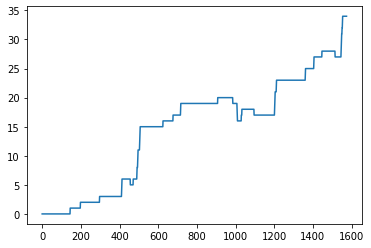

In [146]:
position.plot()

In [139]:
adam_spy_px.SELL_Signal.cumsum()['2015-10-23']

1.0

In [101]:
adam_spy_px.loc['2018-10':'2018-11',['SPY Close','BUY Signal','RSI Signal', 'bollinger_signal', 'MACD Signal', 'SMA Signal', 'CCI Signal']]

,SPY Close,BUY Signal,RSI Signal,bollinger_signal,MACD Signal,SMA Signal,CCI Signal
Date,,,,,,,
2018-10-01,282.982300,0.0,0.0,-1.0,1.0,0.0,0.0
2018-10-02,282.817352,0.0,0.0,-1.0,1.0,0.0,0.0
2018-10-03,282.972595,0.0,0.0,-1.0,1.0,0.0,0.0
2018-10-04,280.760895,0.0,0.0,0.0,1.0,0.0,0.0
2018-10-05,279.189484,0.0,0.0,1.0,1.0,0.0,0.0
2018-10-08,279.189484,0.0,0.0,1.0,1.0,0.0,0.0
2018-10-09,278.782105,0.0,0.0,1.0,1.0,0.0,0.0
2018-10-10,269.954987,1.0,1.0,1.0,1.0,0.0,1.0
2018-10-11,264.008789,1.0,1.0,1.0,1.0,1.0,1.0
